<h1><center> United States Election 2020: Data Analysis based on Counties Characteristics </center></h1>
<h4><center>Maksym Oliinyk, 1004506377 <br> Big Data Tools for Economists (ECO225H1 S)</center></h4>

---
<h2><bold> Outline: </bold></h2>

1. Introduction  
2. Data Analysis 
3. Summary 
4. Future Steps 

---


<h2><center> Introduction </center></h2>

---

The project examines how the preliminary characteristics of various counties influence voting behaviour, whether individuals vote for Republicans or Democrats, during the United States election of 2020. The total population and female population proportion are among the preliminary characteristics. The analysis includes two datasets obtained from https://www.kaggle.com/unanimad/us-election-2020 and https://www.kaggle.com/pauldesalvo/2020-election-analysis/data?select=president_counties.csv and https://data.census.gov/cedsci/table?q=B19013&g=0400000US06%240500000_04000E0US06&tid=ACSDT5Y2019.B19013&moe=false&tp=true. The primary dataset, US Election 2020, contains 32177 observations and six variables:  
- ***state***: state of the United State.
- ***county***: county of the corresponding state.
- ***candidate***: presidential candidate.
- ***party***: party of the presidential candidate.
- ***total_votes***: number of votes that the presidential candidate got in the county in the corresponding state.
- ***won***: a boolean expression indicating whether the presidential candidate won in in the county in the corresponding state (***True*** = *won* and ***False*** = *lost*).

The additional dataset, 2020 Election analysis, contains 3045 observations and 17 variables, from which six comes from the primary dataset, *state*, *county*, *candidate*, *party*, *total_votes*, and *won*:
- ***fips***: numbers that are used to designate certain geographic locations.
- ***state_code***: code of the state.
- ***male***: number of males in the county in the corresponding state.
- ***female***: number of females in the county in the corresponding state. 
- ***median_age***: median age in the county in the corresponding state.
- ***population***: population in the county in the corresponding state. 
- ***female_percentage***: percantage of female population in the county in the corresponding state.
- ***lat***: latitude coordinates of the county.
- ***long***: longitude coordinates of the county. 
- ***color***: colour of the party (Republicans = red and Democrats = blue).

The additional dataset contains a smaller amount of observations since it includes only the won counties of each party. However, it is used to extract preliminary characteristics of the county. 


The additional dataset, American Community Survey of households in 2019, cotains 58 observations and 4 variables:
- ***median_income***: median income.
- ***marginal_error***: marginal error.
- ***id***: some legislation number.
- ***geographic_area_name***: counties of California. 


The data analysis suggests that the preliminary counties' characteristics, such as female population proportion and total population (independent variables), have explanatory power on voting behaviour (dependent variable). Additionally, the analysis includes the fundamental economics variable, median income, in California. However, to conduct an integrated study, the project recommends incorporating complementary data sources of county characteristics.

The main statements that analysis presents are: 
- *Republicans won most of the counties.* 
- *Democrats got most of the votes.* 
- *Median age for counties where Republican Party won is higher than Democratic Party.*
- *Republican Party won most of the counties with a relatively small population.* 
- *Females are might likely to vote for Democrats than Republicans.*
    - *Similarly, males are might likely to vote for Republicans than Democrats.*
- *At least in California, the higher median income is might likely decrease the voting share for Republicans.*
    
---

<h1><center> Project 1 </center></h1> 

---

<h2><center> Data Analysis </center></h2> 

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import requests
from bs4 import BeautifulSoup

plt.style.use('default')

In [2]:
df_president =  pd.read_csv(r"/Users/maximolii/Desktop/UofT/Years/Fourth Year/2/ECO225/Project/ECO225Project/Data/president_county_candidate.csv")
df_president_enrich = pd.read_csv(r"/Users/maximolii/Desktop/UofT/Years/Fourth Year/2/ECO225/Project/ECO225Project/Data/president_counties.csv")

In [3]:
# Check five first observations and variables in the main dataset.
df_president.head(5)

state             county      candidate party  total_votes    won
0  Delaware        Kent County      Joe Biden   DEM        44552   True
1  Delaware        Kent County   Donald Trump   REP        41009  False
2  Delaware        Kent County   Jo Jorgensen   LIB         1044  False
3  Delaware        Kent County  Howie Hawkins   GRN          420  False
4  Delaware  New Castle County      Joe Biden   DEM       195034   True

In [4]:
# Check five first observations and variables in the additional dataset.
df_president_enrich.head(5)

Unnamed: 0                 state                county     candidate party  \
0           0              Delaware           Kent County     Joe Biden   DEM   
1           4              Delaware     New Castle County     Joe Biden   DEM   
2           8              Delaware         Sussex County  Donald Trump   REP   
3          12  District of Columbia  District of Columbia     Joe Biden   DEM   
4          19               Florida        Alachua County     Joe Biden   DEM   

   total_votes   won   fips state_code    male  female  median_age  \
0        44552  True  10001         DE   84271   90551        37.6   
1       195034  True  10003         DE  268870  286263        38.1   
2        71230  True  10005         DE  106429  113111        49.0   
3        39041  True  11001        NaN  324881  359617        33.9   
4        89704  True  12001         FL  127298  135850        31.3   

   population  female_percentage        lat       long color  
0      174822          51.796113  39.086169 -75.568422  blue  
1      555133          51.566562  39.576833 -75.652692  blue  
2      219540          51.521818  38.660553 -75.390038   red  
3      684498          52.537334  38.904734 -77.016294  blue  
4      263148          51.624941  29.674750 -82.357714  blue

As stated in the introduction, the primary dataset contains 32177 observations and six variables, and the supplementary dataset contains 3045 and 17, correspondingly. First, the analysis suggests that, at this stage of the project, secondary variables *fips*, *state_code*, *male*, *female*, *lat*, *long*, and *color* will not provide additional information that could explain effect on voting behaviour. For research, it might be significantly important to understand whether counties' characteristics influence the choice of which party to vote, excluding the exogenous variable such as political debates, news, etc. In other words, the analysis tries to invistigate if there any relationship between counties characteristics and their voting decision.

In [5]:
income_california = pd.read_csv(r"/Users/maximolii/Desktop/UofT/Years/Fourth Year/2/ECO225/Project/ECO225Project/Data/ACSDT5Y2019.B19013_data_with_overlays_2022-03-04T194951.csv",  skiprows=1)

In [6]:
income_california.head(2)

Estimate!!Median household income in the past 12 months (in 2019 inflation-adjusted dollars)  \
0                                              99406                                              
1                                              63750                                              

   Margin of Error!!Median household income in the past 12 months (in 2019 inflation-adjusted dollars)  \
0                                                921                                                     
1                                              17778                                                     

               id        Geographic Area Name  
0  0500000US06001  Alameda County, California  
1  0500000US06003   Alpine County, California

The dataset above presents the basic economic variable to California state. The secondary variable, *id*, does not provide any significant information that might be used to explain the effect on county voting behaviour. As a known fact, there are 58 counties in California; therefore, there are 58 observations in this dataset. 

In [7]:
# Clean additional dataset. (could not find this file in https://www2.census.gov, any suggestions?)
# Rename columns.
income_california = income_california.rename(columns={"Estimate!!Median household income in the past 12 months (in 2019 inflation-adjusted dollars)":"median_income","Geographic Area Name":"transitional"})

# Extract important columns. 
income_california = income_california[["median_income","transitional"]]

# Split column Geographic Area Name into two separate columns for further merge with the additional dataset.
income_california[["county","state"]] = income_california["transitional"]\
.str.split(",", expand = True)

# Extract important columns.
income_california = income_california[["median_income", "county","state"]]

# Does not provide any significant information. 
income_california = income_california.drop(58)

In [8]:
income_california.head(2)

median_income          county        state
0          99406  Alameda County   California
1          63750   Alpine County   California

The table above presents the additional dataset of median household income for California and each county. The variables are median income, county, and state, which is only one, in this case, California. The median income is in US dollars and 2019 inflation-adjusted. For example, in Alameda County, the median income is $99,406 (2019 inflation-adjusted). The number of observations equals the number of counties, 58. 

In [9]:
# The subset of the dataset; accessing rows with REP party.
df_rep = df_president.loc[df_president.party == "REP"].copy()

# Extracting single column, total_votes. 
votes_rep = df_rep["total_votes"]

In [10]:
# Basic summary statistics of total_votes variable for REP party. 
print('Republican Party',"\n"\
      "Min = ", votes_rep.min().round(3),"\n"\
      "Max = ", votes_rep.max().round(3),"\n"\
      "Mean = ", votes_rep.mean().round(3),"\n"\
      "Standard Deviation = ",votes_rep.std().round(3), "\n"\
      "Total = ", votes_rep.sum())

Republican Party 
Min =  0 
Max =  1145530 
Mean =  16098.792 
Standard Deviation =  45531.31 
Total =  74585705


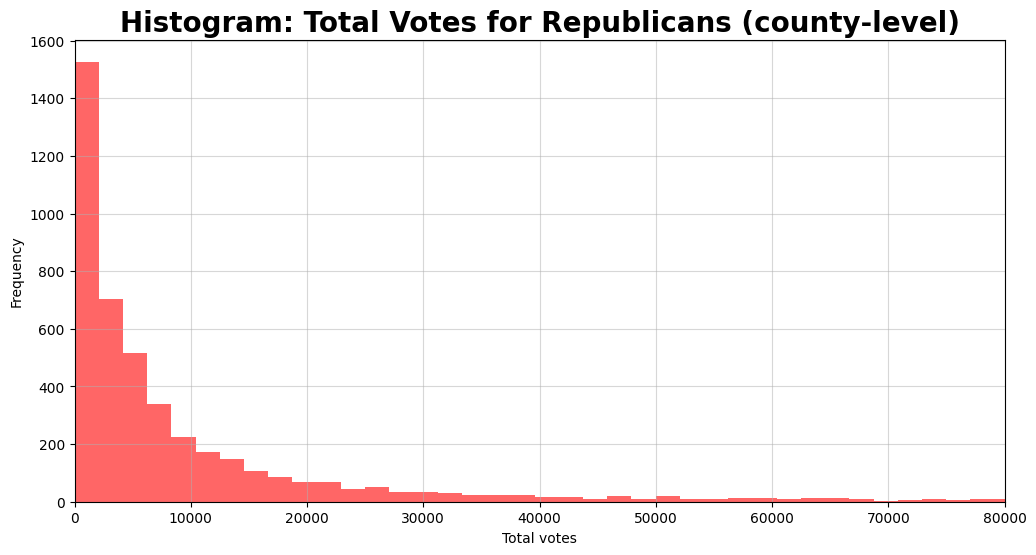

In [11]:
plt.figure(figsize = (12,6))
plt.hist(votes_rep, bins = 550, color= ['#FF000099'])
plt.xlabel("Total votes") 
plt.ylabel("Frequency")
plt.title("Histogram: Total Votes for Republicans (county-level)",\
          fontsize = 20, fontweight = 'bold')
plt.grid(alpha = 0.5)
plt.xlim([0,80000])

plt.show()

In [12]:
# The subset of the dataset; accessing rows with DEM party.
df_dem = df_president.loc[df_president.party == "DEM"].copy()
       
# Extracting single column, total_votes.
votes_dem = df_dem["total_votes"]

In [13]:
# Basic summary statistics of total_votes variable for DEM party. 
print('Democratic Party',"\n"\
      "Min =", votes_dem.min().round(3),"\n"\
      "Max =", votes_dem.max().round(3),"\n"\
      "Mean =", votes_dem.mean().round(3),"\n"\
      "Standard Deviation =",votes_dem.std().round(3),"\n"\
      "Total", votes_dem.sum())

Democratic Party 
Min = 0 
Max = 3028885 
Mean = 17709.137 
Standard Deviation = 80206.437 
Total 82046434


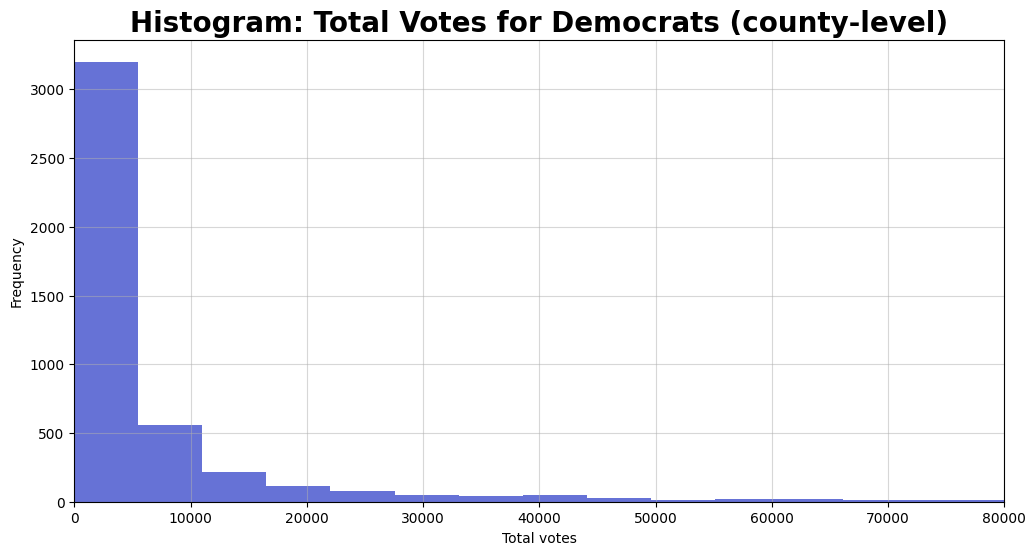

In [14]:
plt.figure(figsize = (12,6))
plt.hist(votes_dem, bins = 550, color= ['#0015BC99'])
plt.xlabel("Total votes") 
plt.ylabel("Frequency")
plt.title("Histogram: Total Votes for Democrats (county-level)",\
          fontsize = 20, fontweight = 'bold')
plt.grid(alpha = 0.5)
plt.xlim([0,80000])

plt.show()

The project starts with descriptive statistics. Above, we can see the comparison between the Republican and Democratic parties (counties level). We can see that Republicans have a lower mean, on average, 16,098 votes per county, while Democrats have an average value of 17,709 votes per county. The gap is 1611 votes or 10%, which is, at a state-level, which might be economically significant. Also, we can observe that the standard deviation of total votes for the Republican Party is lower, suggesting that total votes observations close together. From histograms, we can see that for Republicans, most of the observations lie in the range between 0 and 20000, while for Democrats, 0 and 10000, suggesting that Republicans have more total votes at the county level.

In [15]:
# The subset of the dataset: accessing rows with REP or DEM party.
df_president_short = df_president[df_president\
                                  .party.isin(["REP","DEM"]) == True]

# Extracting variables for data cleaning: state, county, party, and total_votes.
df_president_short = df_president_short[["state","county",\
                                         "party","total_votes"]]

# Cleaning the data; switching rows to columns. 
df_president_short["REP_votes"] = df_president_short[df_president_short.\
                                                     party == "REP"]["total_votes"]
df_president_short["DEM_votes"] = df_president_short[df_president_short.\
                                                     party == "DEM"]["total_votes"]

# Grouping the data. Mainly, we want to remove NAs in rows since REP total_votes does not have DEM total_votes.
df_president_short = df_president_short.groupby(["county"], as_index = False).sum()

# Creating new columns; percent of votes of each party from total votes.
df_president_short["REP_share"] = df_president_short["REP_votes"] / df_president_short["total_votes"] * 100
df_president_short["DEM_share"] = df_president_short["DEM_votes"] / df_president_short["total_votes"] * 100

# Rounding percent of votes.
df_president_short["REP_share"] = df_president_short["REP_share"]\
.round(decimals = 5)

df_president_short["DEM_share"] = df_president_short["DEM_share"]\
.round(decimals = 5)

# Changing the type of variables type from float to int
df_president_short = df_president_short.astype({"DEM_votes":'int', "REP_votes":'int'})

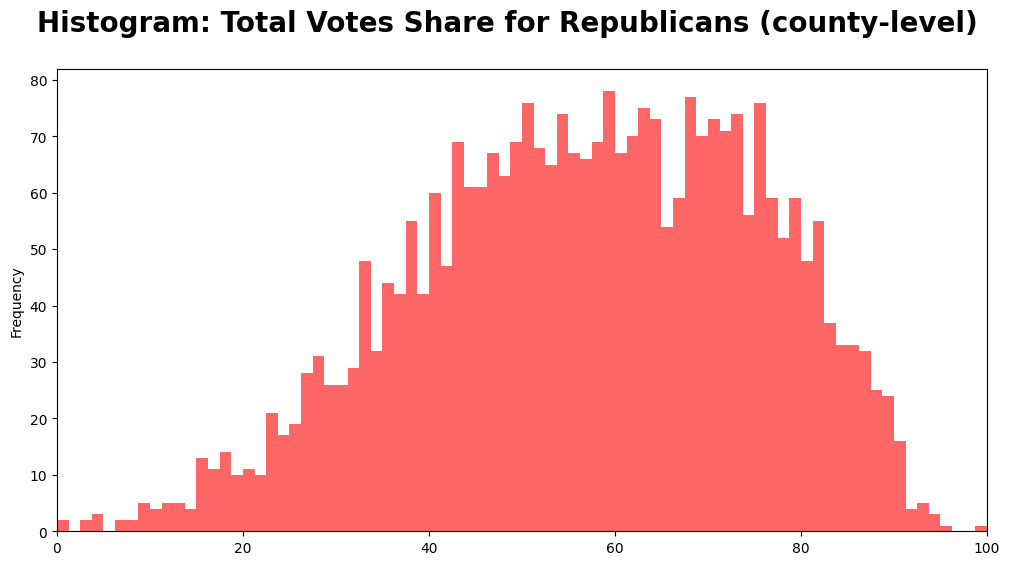

In [16]:
fig, ax1 = plt.subplots(figsize = (12,6))

ax1.hist(df_president_short["REP_share"], bins = 80, color= ['#FF000099'])
plt.setp(ax1, ylabel='Frequency')
plt.xlim([0,100])

fig.suptitle("Histogram: Total Votes Share for Republicans (county-level)",\
             fontsize = 20, fontweight = 'bold')

plt.show()

The histogram above presents the total votes share for Republicans (by county); it is worth noting that this figure would be mirrored for Democrats, as votes that did not go to Republicans went to Democrats; thus, we did not plot the Democratic Party. According to the histogram, the Republican Party receives 60% of the vote on average. Democrats receive 40%, on average. The distribution might be bell-shaped, normally distributed. However, even though it indicates that Republicans received 60% of total votes on average, it does not mean that they received the majority of votes overall because the county's population plays a significant impact. In other words, the Republican Party might get 60% of the total votes in a county with 10,000 people, while Democrats received 70% of the total votes in a county with 1,000,000 people. 

<h2><center> Top Five Parties based on the total votes </center></h2> 



In [17]:
# Group the dataset by party (top 5), and sum up total votes they got. 
df_parties = df_president[[ 'party','total_votes']]\
.groupby(['party'], as_index = False).sum()
df_parties = df_parties.sort_values(by = "total_votes", ascending = False)
df_parties = df_parties.reset_index(drop = True)
df_parties = df_parties.head(5)

df_parties.head(5)

party  total_votes
0   DEM     82046434
1   REP     74585705
2   LIB      1874183
3   GRN       407508
4   WRI       254274

In [18]:
# Create new column percent (percent = "total_votes" / (sum of "total_votes") * 100.
df_parties["percent"] = df_parties["total_votes"] / df_parties["total_votes"].sum() * 100

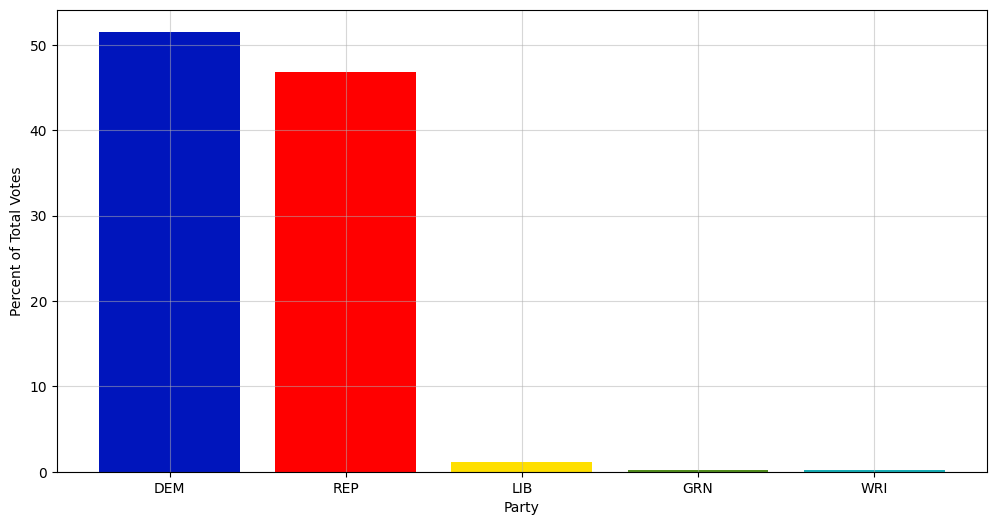

In [19]:
# Plot the barchart of the "percent" (top 5 parties).
plt.figure(figsize = (12,6))
plt.bar(df_parties['party'], df_parties['percent'],\
        color=[ '#0015BC', '#FF0000', '#ffdf00', '#508C1B', '#17ADB5'])
plt.xlabel("Party")
plt.ylabel("Percent of Total Votes")
plt.grid(alpha = 0.5)

The bar plot above represents the top five parties based on the total votes. As stated above (figure: Total Votes Share for Republicans (county-level)), even though, on average, Republicans got more votes, overall, they got fewer votes than the Democratic Party, suggesting that the Republican Party got most of the votes in counties with small population. Further, the project will not cover analysis regarding the Liberal and Green parties and write-ins.  

<h2><center> Top Five Parties based on the won counties </center></h2> 

In [20]:
# Group the dataset by party (top 5), and sum up total counties they won. 
df_counties = df_president[['party','won']]\
.groupby(['party'], as_index = False).sum()
df_counties = df_counties.sort_values(by = "won",\
                                      ascending = False)
df_counties = df_counties.reset_index(drop = True)
df_counties = df_counties.head(5)

df_counties

party   won
0   REP  3219
1   DEM  1410
2   WRI     3
3   LIB     1
4   LLP     0

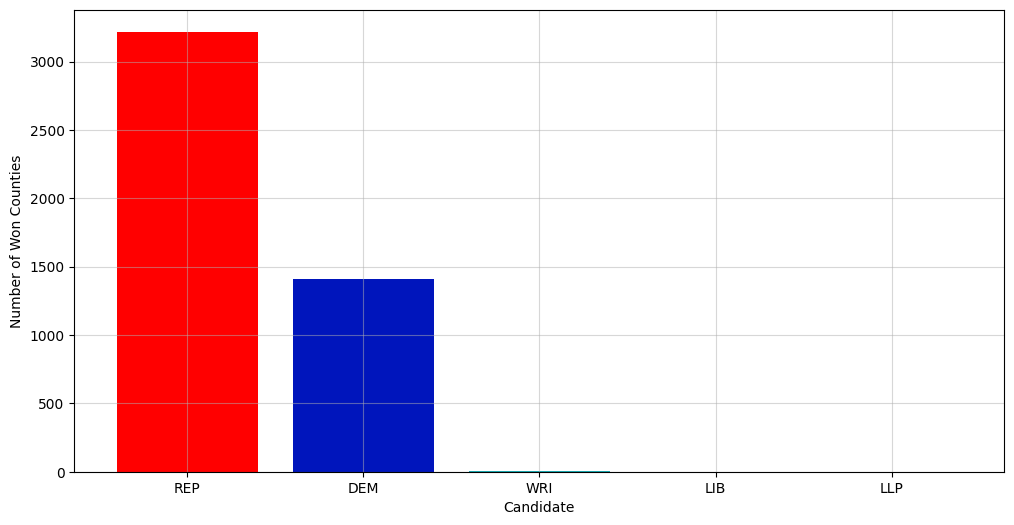

In [21]:
# Plot the barchart of the "won" (top 5 parties).
plt.figure(figsize = (12,6))
plt.bar(df_counties['party'],\
        df_counties['won'],\
        color=[ '#FF0000', '#0015BC',\
               '#17ADB5', '#ffdf00', '#508C1B'])
plt.xlabel("Candidate")
plt.ylabel("Number of Won Counties")
plt.grid(alpha = 0.5)

According to this bar chart, even though the Democratic Party received the majority of votes, the Republican Party received the majority of counties. The path to electoral victory, on the other hand, is determined by the number of votes a candidate receives in a state, not by the number of counties won.

<h2><center> County: Republicans versus Democrats </center></h2> 

In [22]:
# Group the dataset by party and states, 
#and sum up total counties they won in each state and total votes they got. 
df_countities = df_president[['party','won', "state", "total_votes"]].groupby(['party', "state"], as_index = False).sum().sort_values(by='state', ascending = True)
df_countities = df_countities.rename(columns = {"won": "won counties"})

# Extract the subset from the dataset; accessing rows with REP and DEM parties.
df_countities = df_countities[df_countities.party.isin(["REP","DEM"]) == True].reset_index(drop = True)

df_countities.head(5)

party    state  won counties  total_votes
0   DEM  Alabama            13       849648
1   REP  Alabama            54      1441168
2   REP   Alaska            20       189892
3   DEM   Alaska            17       153405
4   DEM  Arizona             5      1672143

The table above presents the subset of the central dataset filtered for major parties, Democrats and Republicans. The variables are party, state, number of won counties by party, and total votes the party got in that county. The number of observations equals the number of states multiple by two since we include two major parties and each county has a vote for both parties. For example, the Democratic party has won 13 counties and got 849,648 votes, while the Republican party has won 54 counties and got 1,441,168 votes. 

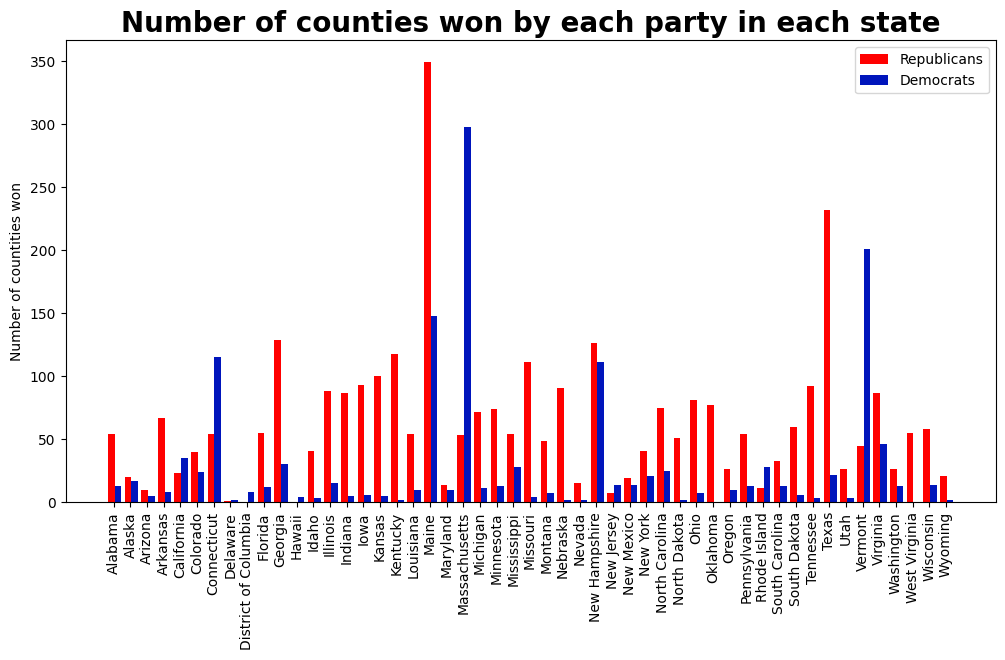

In [23]:
# Extract "won counties" for each party into the list.
rep = list(df_countities.loc[df_countities['party'] == "REP"]["won counties"])
dem = list(df_countities.loc[df_countities['party'] == "DEM"]["won counties"])

# Extract unique "state" strings into the list.
x = list(df_countities["state"].unique())
X_axis = np.arange(len(x))

# Plot the barchart of "won counties" for each candidate. 

plt.figure(figsize = (12,6))
plt.bar(X_axis - 0.15, rep, 0.4, label = 'Republicans', color = "#FF0000")
plt.bar(X_axis + 0.25, dem, 0.4, label = 'Democrats', color = "#0015BC")
plt.xticks(X_axis, x)
plt.ylabel("Number of countities won")
plt.title("Number of counties won by each party in each state", fontweight = 'bold', fontsize = 20)
plt.legend()
plt.xticks(rotation=90)

plt.show()

The figure above represents the total number of won counties by major parties, Democrats and Republicans, in each state. The Republican party won more counties, by a significant margin, in Maine, Texas, and Georgia.  However, as stated earlier, the number of votes a candidate receives in a state, not the number of counties gained, determines the path to electoral victory. Therefore, the figure below presents the share of votes for major parties, Democrats and Republicans, in each state. 

In [24]:
# Group the dataset by party and states, 
#and sum up total counties they won in each state and total votes they got. 
df_share = df_president[['party','won', "state", "total_votes"]].groupby(['party', "state"], as_index = False).sum().sort_values(by='state', ascending = True)
df_countities = df_countities.rename(columns = {"won": "won counties"})

In [25]:
# The subset of the dataset: accessing rows with REP or DEM party.
df_share = df_president[df_president\
                                  .party.isin(["REP","DEM"]) == True]

# Extracting variables for data cleaning: state, county, party, and total_votes.
df_share = df_share[["state","county",\
                                         "party","total_votes"]]

# Cleaning the data; switching rows to columns. 
df_share["REP_votes"] = df_share[df_share.\
                                 party == "REP"]["total_votes"]
df_share["DEM_votes"] = df_share[df_share.\
                                 party == "DEM"]["total_votes"]

# Grouping the data. Mainly, we want to remove NAs in rows since REP total_votes does not have DEM total_votes.
df_share = df_share.groupby(["state"], as_index = False).sum()

# Creating new columns; percent of votes of each party from total votes.
df_share["REP_share"] = df_share["REP_votes"] / df_share["total_votes"] * 100
df_share["DEM_share"] = df_share["DEM_votes"] / df_share["total_votes"] * 100

# Rounding percent of votes.
df_share["REP_share"] = df_share["REP_share"]\
.round(decimals = 5)

df_share["DEM_share"] = df_share["DEM_share"]\
.round(decimals = 5)

# Changing the type of variables type from float to int
df_share = df_share.astype({"DEM_votes":'int', "REP_votes":'int'})

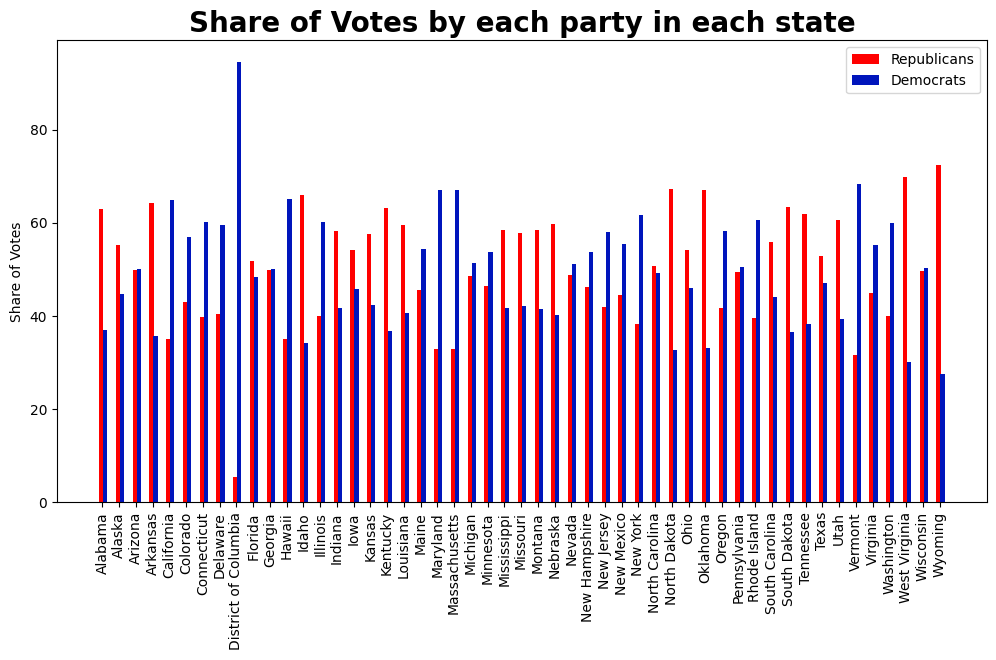

In [26]:
# Extract share of votes for each party into the list.
rep_share = list(df_share["REP_share"])
dem_share = list(df_share["DEM_share"])

# Extract unique "state" strings into the list.
x = list(df_share["state"].unique())
X_axis = np.arange(len(x))

# Plot the barchart of share of votes for each party. 

plt.figure(figsize = (12,6))
plt.bar(X_axis - 0.07, rep_share, 0.25, label = 'Republicans', color = "#FF0000")
plt.bar(X_axis + 0.17, dem_share, 0.25, label = 'Democrats', color = "#0015BC")
plt.xticks(X_axis, x)
plt.ylabel("Share of Votes")
plt.title("Share of Votes by each party in each state", fontweight = 'bold', fontsize = 20)
plt.legend()
plt.xticks(rotation=90)

plt.show()

<h2><center> County: Characteristics </center></h2> 

<h3><center> Population </center></h3> 

In [27]:
# Extract the subset from the data set; accessing rows with REP and DEM parties.
df_rd = df_president[df_president.party.isin(["REP","DEM"]) == True].reset_index(drop = True)
# Merge the df_dj subset with additional enriched dataset.
df_rd = df_rd.merge(df_president_enrich[["state", "county", "population","female_percentage","median_age"]])

In [28]:
# Creating two different DataFrames for eqch candidate.
df_rep = df_rd.loc[df_rd.party == "REP"]
df_dem = df_rd.loc[df_rd.party == "DEM"]

In [29]:
df_rep_hp = df_rep[df_rep.population >= 1000000]
df_dem_hp = df_dem[df_dem.population >= 1000000]

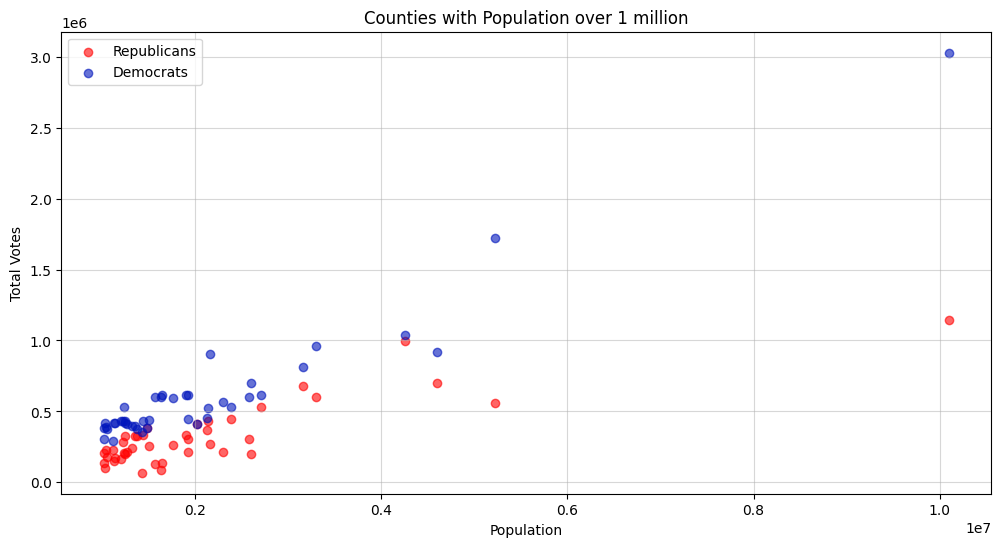

In [30]:
# Plot scatterplot total votes with respect to population.
fig, ax1 = plt.subplots( figsize = (12,6))

# Add scatterplots
ax1.scatter(df_rep_hp['population'], df_rep_hp['total_votes'], color=['#FF000099'], label = "Republicans")
ax1.scatter(df_dem_hp['population'], df_dem_hp['total_votes'] , color=['#0015BC99'], label = "Democrats")
ax1.title.set_text("Counties with Population over 1 million")
ax1.set_xlabel("Population")
ax1.set_ylabel("Total Votes")
plt.legend()
ax1.grid(alpha = 0.5)

According to the scatterplot above, for counties with more than 1 million people, the Democratic party got more votes than Republicans, intersecting with the idea stated earlier. Even though the Republican Party has, on average, 60% of total votes, it might be from small population counties. Therefore, we look at counties with lower populations. 

In [31]:
df_rep_mp = df_rep[(df_rep.population < 1000000) & (df_rep.population >= 200000)]
df_dem_mp = df_dem[(df_dem.population < 1000000) & (df_dem.population >= 200000)]

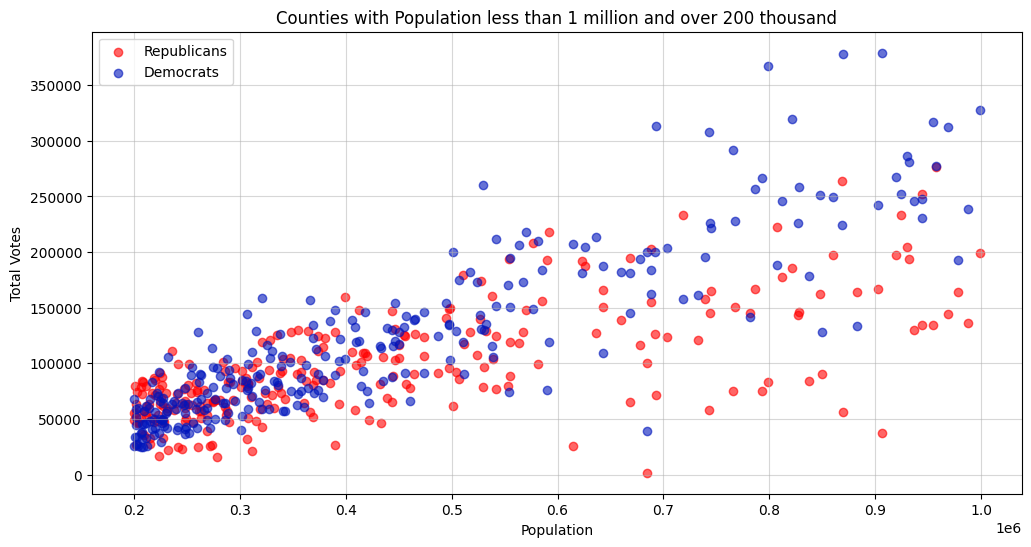

In [32]:
# Plot scatterplot total votes with respect to population.
fig, ax1 = plt.subplots( figsize = (12,6))

# Add scatterplots
ax1.scatter(df_rep_mp['population'], df_rep_mp['total_votes'], color=['#FF000099'], label = "Republicans")
ax1.scatter(df_dem_mp['population'], df_dem_mp['total_votes'], color=['#0015BC99'], label = "Democrats")
ax1.title.set_text("Counties with Population less than 1 million and over 200 thousand")
ax1.set_xlabel("Population")
ax1.set_ylabel("Total Votes")
plt.legend()
ax1.grid(alpha = 0.5)

Similarly, in this case, this scatterplot indicates that in counties with a population between 200 thousand and 1 million people, Democrats still got more votes than Republicans. However, the lefthand side is uneven, suggesting that we need to look at counties with even lower populations. 

In [33]:
df_rep_lp = df_rep[df_rep.population < 200000]
df_dem_lp = df_dem[df_dem.population < 200000]

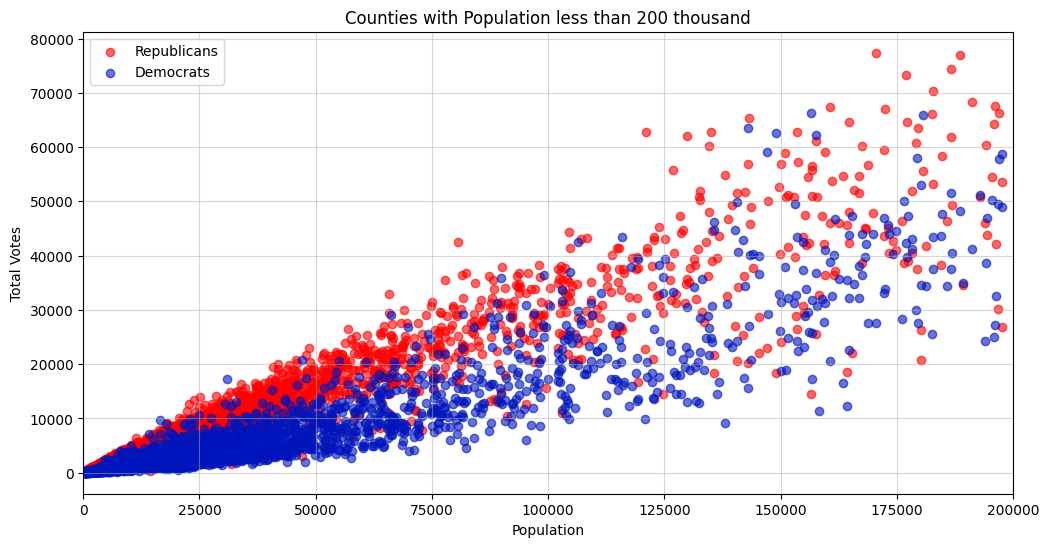

In [34]:
# Plot scatterplot total votes with respect to population.
fig, ax1 = plt.subplots( figsize = (12,6))

# Add scatterplots
ax1.scatter(df_rep_lp['population'], df_rep_lp['total_votes'], color=['#FF000099'], label = "Republicans")
ax1.scatter(df_dem_lp['population'], df_dem_lp['total_votes'] , color=['#0015BC99'], label = "Democrats" )
ax1.title.set_text("Counties with Population less than 200 thousand")
ax1.set_xlabel("Population")
ax1.set_ylabel("Total Votes")
plt.legend()
plt.xlim([0,200000])
ax1.grid(alpha = 0.5)

As analysis suggested earlier, 60% of total votes come from counties with a low population. We observe that, in this case, the Republican Party got most of the votes. However, as the population increases, Democrats are catching up.

<h3><center> Demographics </center></h3> 

In [35]:
# Lock observations to counties where candidate won. 
df_rep = df_rep.loc[df_rep.won == True]
df_dem = df_dem.loc[df_dem.won == True]

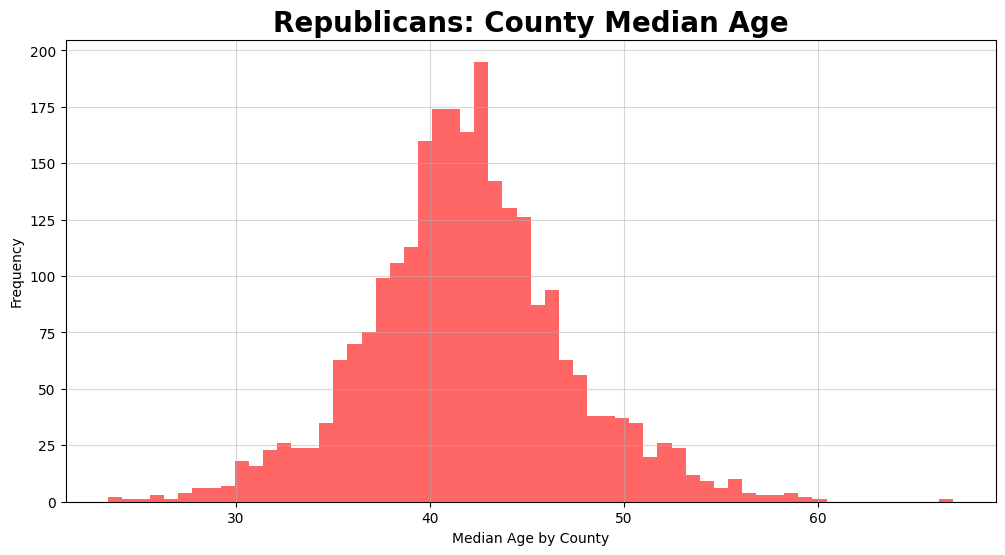

In [36]:
# Plot histogram of median age for REP party (county level). 
plt.figure(figsize = (12,6))
plt.hist(df_rep['median_age'], bins = 60, color=['#FF000099'])
plt.xlabel("Median Age by County")
plt.ylabel("Frequency")
plt.title("Republicans: County Median Age", fontsize = 20, fontweight = 'bold')
plt.grid(alpha = 0.5)

The histogram above presents each county median age where Repuplicans won. We can observe the average value is around 41 years old and distribution has short tails, implying most of the observations lie around the mean. 

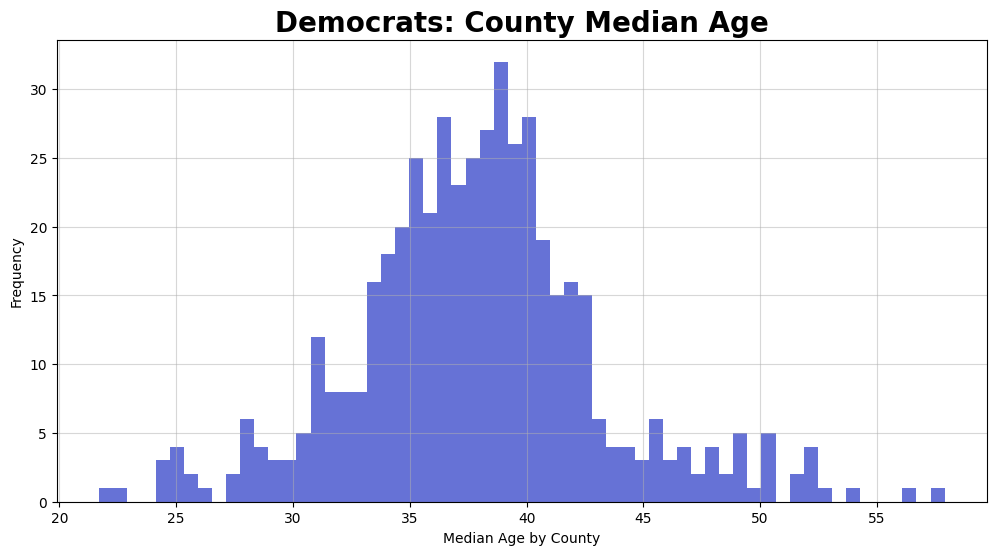

In [37]:
# Plot histogram of median age for DEM party (county level).  
plt.figure(figsize = (12,6))
plt.hist(df_dem['median_age'], bins = 60,  color=['#0015BC99'])
plt.xlabel("Median Age by County")
plt.ylabel("Frequency")
plt.title("Democrats: County Median Age", fontsize = 20, fontweight = 'bold')
plt.grid(alpha = 0.5)

The histogram above presents each county's median age where Democrats won. We can observe the average value is around 36 years old, and distribution has long tails, implying that distribution includes outliers. 

Two histograms shown above suggests that Republican voters are might likely to be older, while Democrat are might likely be younger.  

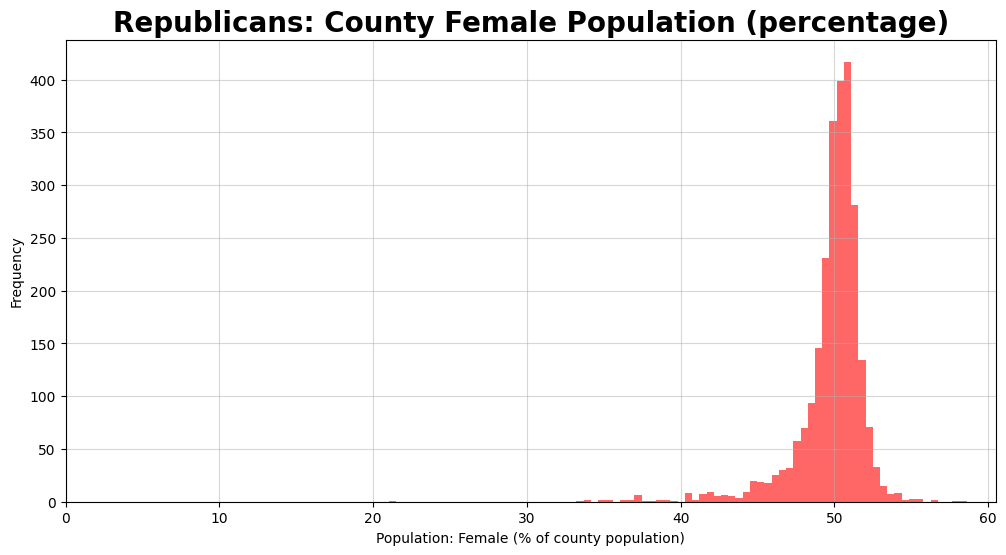

In [38]:
# Plot histogram of female percentage of county population for REP party.
plt.figure(figsize = (12,6))
plt.hist(df_rep['female_percentage'], bins = 80, color=['#FF000099'])
plt.xlabel("Population: Female (% of county population)")
plt.ylabel("Frequency")
plt.xlim(0)
plt.title("Republicans: County Female Population (percentage)", fontsize = 20, fontweight = 'bold')
plt.grid(alpha = 0.5)

The histogram above presents each county female population percentage where Repuplicans won. We can observe the average value is around 50 percent and distribution has long tails, implying that distribution includes outliers. 

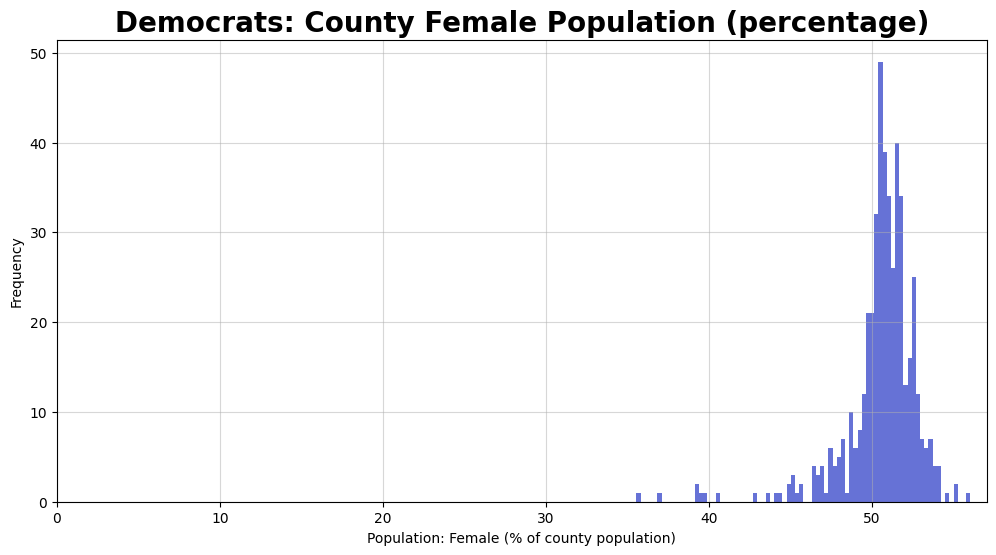

In [39]:
# Plot histogram of female percentage of county population for DEM party.
plt.figure(figsize = (12,6))
plt.hist(df_dem['female_percentage'], bins = 80, color=['#0015BC99'])
plt.xlabel("Population: Female (% of county population)")
plt.ylabel("Frequency")
plt.xlim(0)
plt.title("Democrats: County Female Population (percentage)", fontsize = 20, fontweight = 'bold')
plt.grid(alpha = 0.5)

The histogram above presents each county female population percentage where Democrats won. We can observe the average value is around 52 percent and distribution has short tails, implying most of the observations lie around the mean. 


Two histograms shown above suggests that Republican voters are might likely to be males, while Democrat are might likely be females.  

<h1><center> Project 2 </center></h1> 

---

In [40]:
# The subset of the dataset: accessing rows with REP or DEM party.
df_president_map = df_president[df_president.party.isin(["REP","DEM"]) == True]

# Extract variables for data cleaning: state, county, party, and total_votes.
df_president_map = df_president_map[["state","county","party","total_votes"]]

# Cleanmthe data; switching rows to columns. 
df_president_map["REP_votes"] = df_president_map[df_president_map.party == "REP"]["total_votes"]
df_president_map["DEM_votes"] = df_president_map[df_president_map.party == "DEM"]["total_votes"]

# Group the data. Mainly, we want to remove NAs in rows since REP total_votes does not have DEM total_votes.
df_president_map = df_president_map.groupby(["state","county"], as_index = False).sum()

# Change the type of variables type from float to int
df_president_map = df_president_map.astype({"DEM_votes":'int', "REP_votes":'int'})

In [41]:
# The subset of the dataset: accessing rows with California state
df_california = df_president_map.query("state == 'California'")

In [42]:
# Load state geometry. 
state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")
# Load county geometry.
county_gdf = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2019/COUNTY/tl_2019_us_county.zip")

# Get subset of county geometry for California.
california_gdf = county_gdf[county_gdf.STATEFP == "06"][["NAMELSAD","geometry"]]

In [43]:
# Merge the main dataset with geometry ones. 
california = california_gdf.merge(df_california, right_on = "county", left_on = "NAMELSAD", how = "inner")[["state","county","total_votes","REP_votes","DEM_votes","geometry"]]

In [44]:
# Create new columns share of votes for Democrats and Republicans.
california["DEM_share"] = california["DEM_votes"] / california["total_votes"] * 100
california["REP_share"] = california["REP_votes"] / california["total_votes"] * 100

In [45]:
# Merge the additional dataset with geometry ones. 
california_income = california_gdf.merge(income_california, right_on = "county", left_on = "NAMELSAD", how = "inner")[["state","county","geometry","median_income"]]

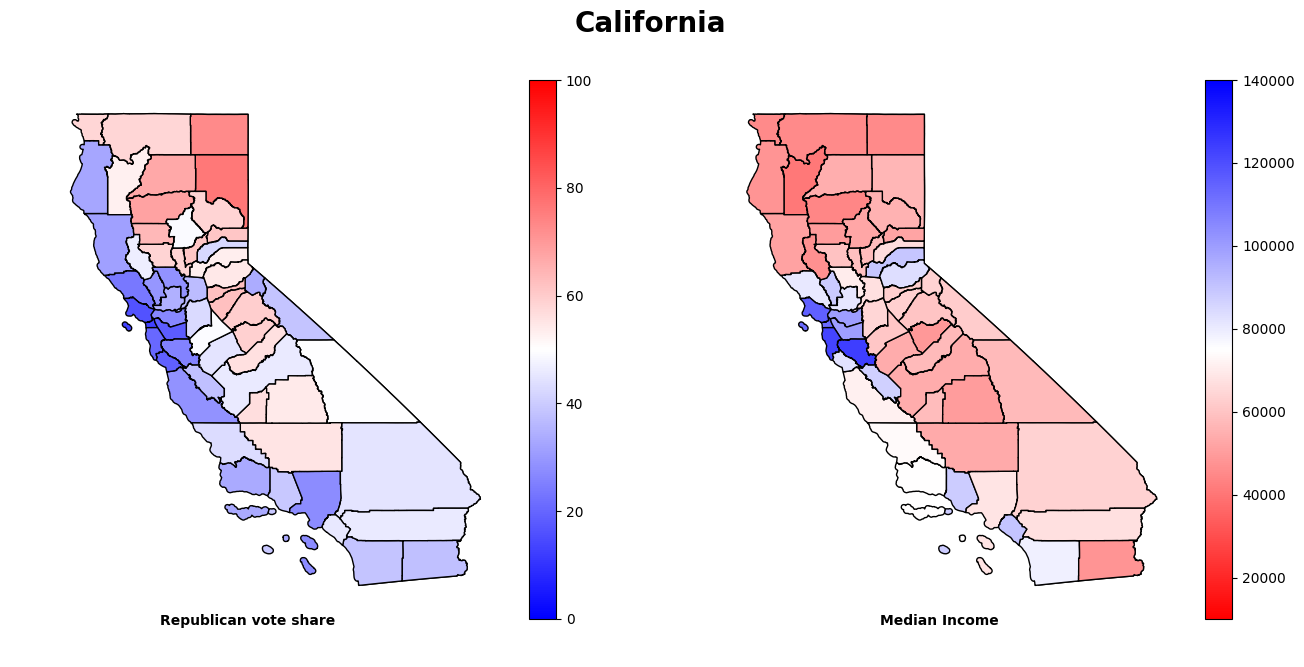

In [46]:
# Initialize a plot.
fig, gax = plt.subplots(ncols=2,figsize=(16, 7))

# Plot Texas's borders by only plotting rows in which the name is 'Texas'.
state_df.query("NAME == 'California'").plot(ax=gax[0], edgecolor="black", color="white")

# Plot, from the main dataset, the share of votes for the Republican Party (Red).
california.plot(
    ax=gax[0], edgecolor='black', column='REP_share', legend=True, cmap='bwr',
    vmin=0, vmax=100)

# Add Annotation to the plot. 
gax[0].annotate('Republican vote share', xy=(0.1, 0.06), 
             xycoords='figure fraction',
            weight='bold')

# Plot California's borders by only plotting rows in which the name is 'California'.
state_df.query("NAME == 'California'").plot(ax=gax[1], edgecolor="black", color="white")

# Plot, from the main dataset, the median income by county.
california_income.plot(
    ax=gax[1], edgecolor='black', column='median_income', legend=True, cmap='bwr_r',
    vmin=10000, vmax=140000)

# Add Annotation to the plot. 
gax[1].annotate('Median Income', xy=(0.55, 0.06), 
             xycoords='figure fraction',
            weight='bold')

# Title of the figure
fig.suptitle('California', fontsize=20, fontweight = 'bold')

# Remove axis; we do not need longitudes and latitudes.
gax[0].axis('off')
gax[1].axis('off')

plt.show()

The two maps above present California state. The map on the left is Republican (red) and Democrats (blue) vote share and on the right is the median income based on the American Community Survey of households in 2019. Initially, we might say that there is no pattern. However, there are some distinct counties. For example, the median income in the left map's middle and west, the San Francisco Bay area, is between \\$120,000 and \\$140,000. The Republican vote share is around 20%, indicating that counties with higher median income are likely to vote for Democrats. Also, we can look at the northeast part of California, the superior California region, where the median income is between \\$30,000 and \\$55,000. The Republican vote share is between 60% to 70%. However, other counties, such as San Bernardino, have an inconsistent relationship. Also, we should not reject the other variables that might influence voting behaviour and median income. As a result, we may be interested in looking for a development index since, for example, Silicon Valley, which is located in the San Francisco Bay area, could have a large impact.

In [47]:
prove = df_california.merge(income_california, right_on = "county", left_on = "county", how = "inner")

prove["REP_share"] = prove["REP_votes"] / prove["total_votes"] * 100
prove["DEM_share"] = prove["DEM_votes"] / prove["total_votes"] * 100

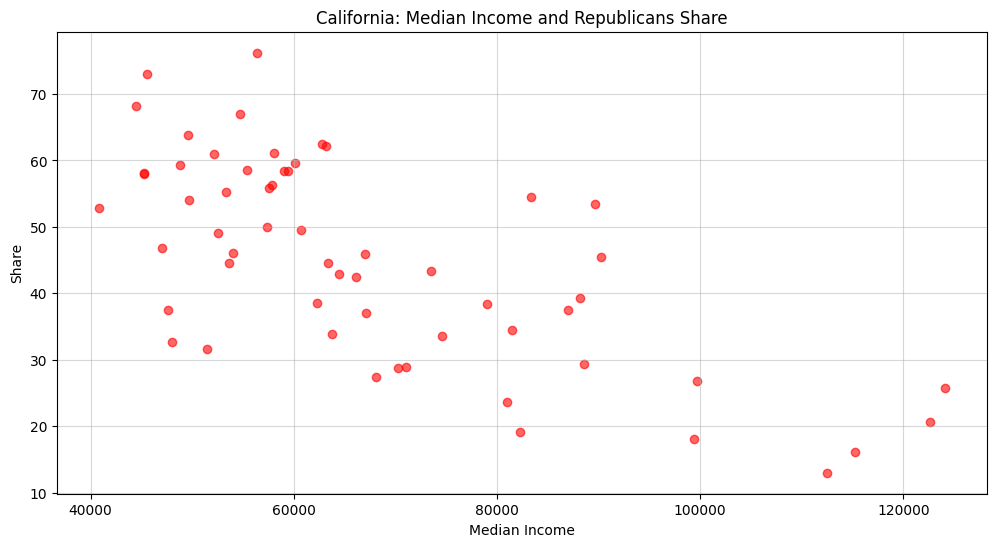

In [48]:
# Plot scatterplot share with respect to median income (state-level).
fig, ax1 = plt.subplots(figsize = (12,6))

# Add scatterplots
ax1.scatter(prove['median_income'], prove['REP_share'], color=['#FF000099'])
ax1.title.set_text("California: Median Income and Republicans Share")
ax1.set_xlabel("Median Income")
ax1.set_ylabel("Share")
ax1.grid(alpha = 0.5)

There is a relationship between median income and Republican vote share. Specifically, as the median income rises, the county is less likely to vote Republican. We could, however, look at the development index, as previously suggested.

<h1><center> THE MESSAGE! </center></h1>

---

The key question I'd like to address is whether or if there are any stereotypes or behaviours that favour Republicans over Democrats. Is it purely exogenous elements like debates, news, marketing, or promises, or is it a development of the region, median income, or population? In other words, whether development of the region changes the voting behaviour. The key question I'd like to address is whether or if there are any stereotypes or behaviours that favour Republicans over Democrats. Is it purely exogenous elements like debates, news, marketing, or promises, or is it a development of the region, median income, or population? In other words, whether a county changes the voting behaviour. 

<h1><center> Project 3 </center></h1>

---

In [360]:
# Load the API key file.
api = pd.read_csv("/Users/maximolii/Desktop/UofT/Years/Fourth Year/2/ECO225/Project/ECO225Project/Data/API.csv")

# Extract the US census API key.
census_api = api.loc[api["API"] == 'census']["KEY"].iloc[0]

In [515]:
# URL to the census.gov API.
HOST = "https://api.census.gov/data"

# Census API.
KEY = "&key={0}".format(census_api)

# URL struture for data extraction. 
# Year.
year = "/2020"

# Path to the required dataset.
dataset = "/acs/acs5"
g = "?get="

# Get variables required.
variables = "NAME,B19301_001E"

# Geography code.
# "state:*" -> all states.
# "us:*" -> whole US.
# In general: "state:{state code}"
location = "&for=state:*"


In [516]:
# Request URL. 
query_url = f"{HOST}{year}{dataset}{g}{variables}{location}{KEY}"

In [517]:
# Send request to record the response from query_url.
response = requests.get(query_url)

In [518]:
# Define function that returns the response as a DataFrame.
def json_to_dataframe(response):
    """Return the response as DataFrame.
    """
    return pd.DataFrame(response.json()[1:], columns=response.json()[0])

In [519]:
# Convert response to DataFrame.
df_income = json_to_dataframe(response)

df_income.head(1)

NAME B19301_001E state
0  Pennsylvania       35518    42

In [520]:
# Extract meaningful columns.
df_income = df_income[["NAME", "B19301_001E"]]

# Rename columns to understandable variables.
df_income = df_income.rename(columns={"NAME": "state", "B19301_001E": "income_capita"})

In [521]:
# Drop observation for Puerto Rico.
df_income = df_income.drop([48])

Puerto Ricans do not have the right to vote in presidential elections.

In [522]:
# Merge the income with voting share data (state-level).
df_income_state = df_income.merge(df_share, on = "state")

In [523]:
df_income_state.head(1)

state income_capita  total_votes  REP_votes  DEM_votes  REP_share  \
0  Pennsylvania         35518      6838186    3378263    3459923   49.40291   

   DEM_share  
0   50.59709

In [524]:
# Link to a wikipedia page. 
URL = 'https://en.wikipedia.org/wiki/ISO_3166-2:US'

# Send request to record the response from URL.
response = requests.get(URL)

# Check if the response was successful. (Successful responses: 200-299)
print('Status code\n', response.status_code)

Status code
 200


In [525]:
# Get the structured soup object from the webpage response.
soup_object = BeautifulSoup(response.content)

In [526]:
# Obtain the relevant data which enclosed in the <table> HTML tag with the class name 'wikitable sortable'.
data_table = soup_object.find_all('table', 'wikitable sortable')[0]

In [527]:
# Extract elements which are enclosed in the <tr> HTML tag.
all_values = data_table.find_all('tr') # All rows separated by 'tr'.

In [528]:
# Create a DataFrame object with columns from webpage table.
# Create an empty dataframe
df_iso_state = pd.DataFrame(columns = ['code',\
                                       'state']) 
# Initialise index to zero
i = 0 

for row in all_values[1:]:
    values = row.find_all('td') # Extract all elements with tag <td>
    # Pick only the text part from the <td> tag
    code = values[0].text.strip()
    state = values[1].text.strip()
    
    # Store it in the dataframe as a row
    df_iso_state.loc[i] = [code, state] 
    i += 1

In [529]:
# Split column code into two separate columns for further merge with the additional dataset.
df_iso_state[["US","code"]] = df_iso_state["code"].str.split("-", expand= True)

# Extract relevant columns.
df_iso_state = df_iso_state[["code","state"]]

In [530]:
# Merge the income and state datasets with iso_state dataset.
df_income_state = df_iso_state.merge(df_income_state, on = "state")

In [531]:
df_income_state.head(1)

code    state income_capita  total_votes  REP_votes  DEM_votes  REP_share  \
0   AL  Alabama         28934      2290816    1441168     849648   62.91068   

   DEM_share  
0   37.08932

In [532]:
maps = state_voting.merge(df_income_state, right_on = "state", left_on = "NAME", how = "inner")
maps.head(1)

maps["won"] = maps["REP_share"] > maps["DEM_share"]

In [676]:
mapping = maps[maps["state"].isin(["Maine", "New York", "Pennsylvania",
                                "West Virginia", "Virginia", "Kentucky",
                                "Tennessee", "North Carolina", "South Carolina",
                                "Georgia", "Alabama", "Mississippi",
                                "Arkansas", "Louisiana", "Ohio",
                                "Indiana", "Illinois", "Missouri", 
                                "Wisconsin", "Minnesota", "Iowa",
                                "Kansas", "Nebraska", "South Dakota",
                                "North Dakota", "Texas", "Oklahoma",
                                "New Mexico", "Arizona", "Colorado",
                                "Wyoming", "Montana", "Idaho",
                                "Washington", "Oregon", "Utah",
                                "Nevada", "California"])]

In [678]:
florida = maps[maps["state"].isin(["Florida"])]

delaware = maps[maps["state"].isin(["Delaware"])]

new_jersey = maps[maps["state"].isin(["New Jersey"])]

connecticut = maps[maps["state"].isin(["Connecticut"])]

rhode_island = maps[maps["state"].isin(["Rhode Island"])]

maryland = maps[maps["state"].isin(["Maryland"])]

massachusetts = maps[maps["state"].isin(["Massachusetts"])]

vermont = maps[maps["state"].isin(["Vermont"])]

new_hampshire = maps[maps["state"].isin(["New Hampshire"])]

michigan = maps[maps["state"].isin(["Michigan"])]

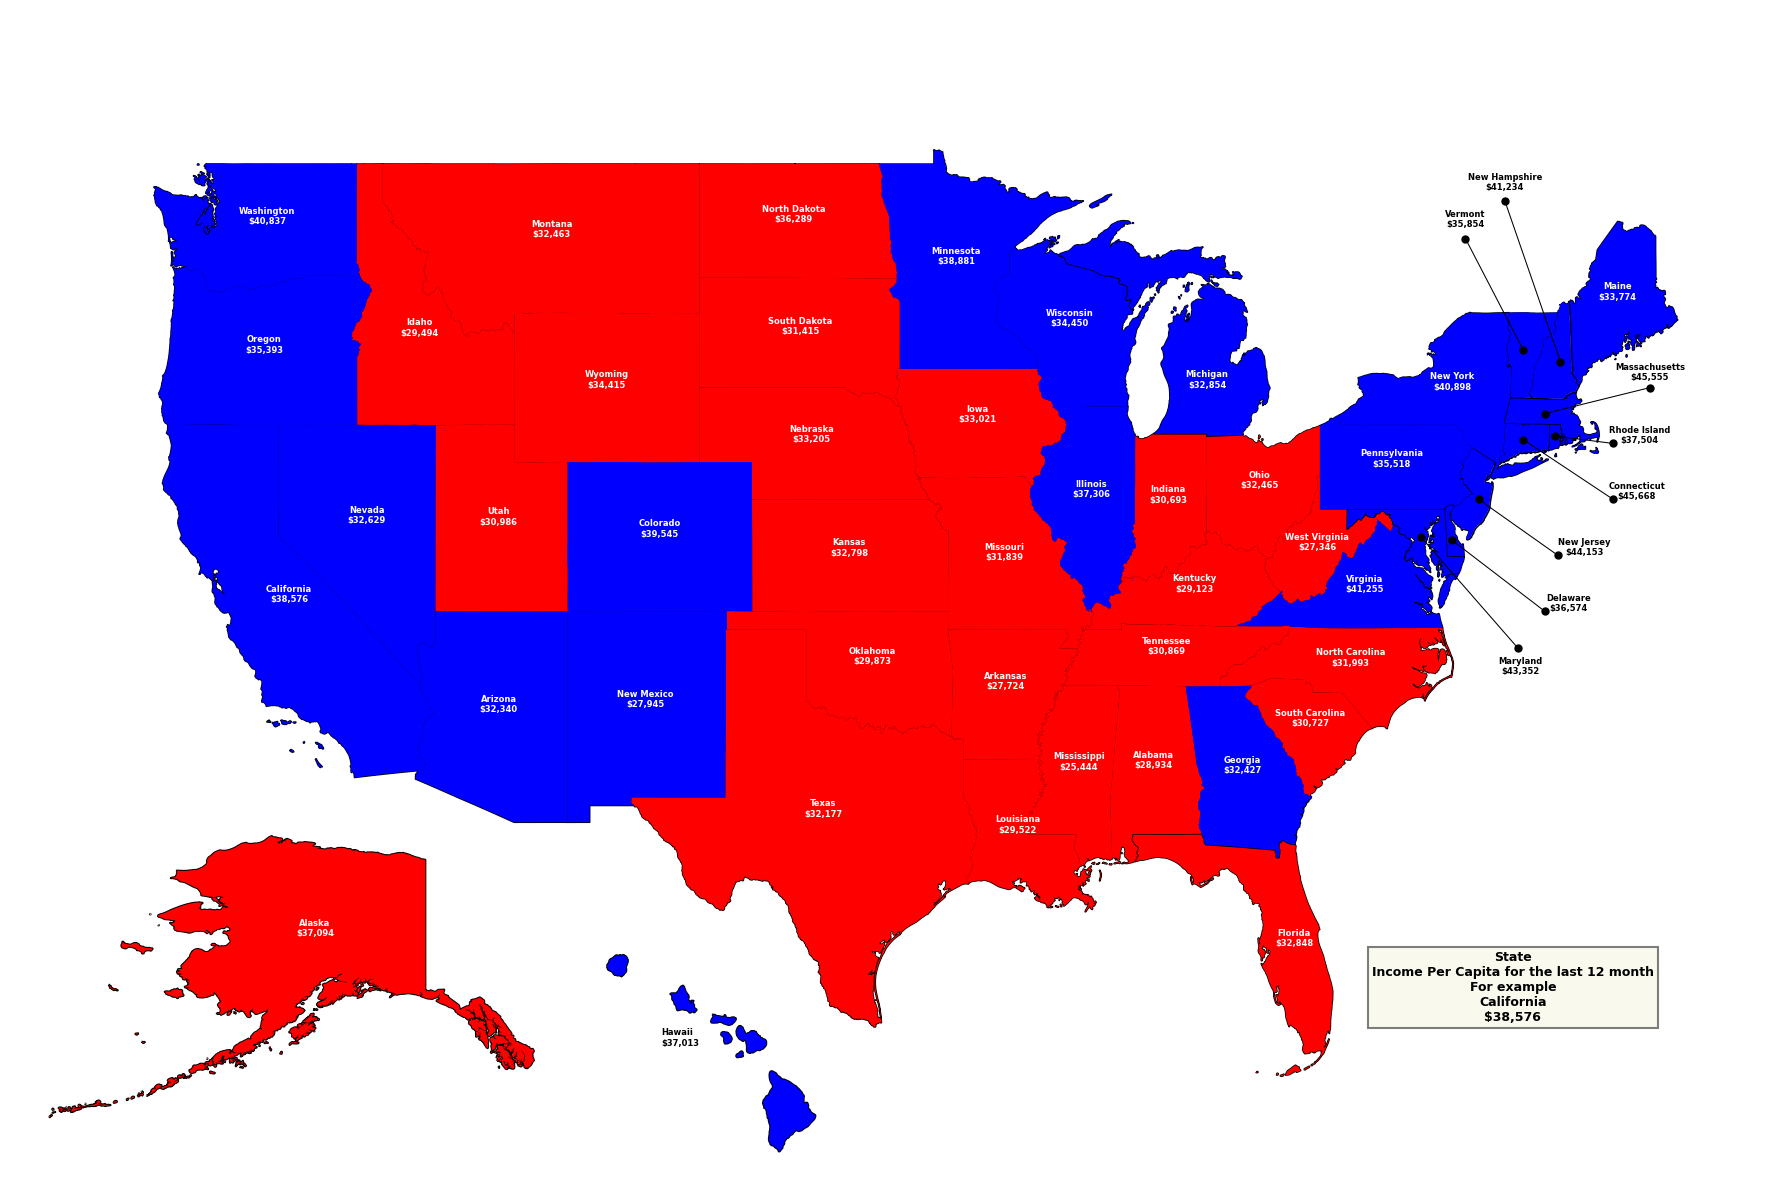

In [700]:
# create an axis with 2 insets − this defines the inset sizes
fig, continental_ax = plt.subplots(figsize=(20, 10), dpi = 150)
alaska_ax = continental_ax.inset_axes([.015, .02, .3, .3])
hawaii_ax = continental_ax.inset_axes([.3, .01, .2, .19])

# Set bounds to fit desired areas in each plot
continental_ax.set_xlim(-130, -64)
continental_ax.set_ylim(22, 53)

alaska_ax.set_ylim(51, 72)
alaska_ax.set_xlim(-180, -127)

hawaii_ax.set_ylim(18.8, 22.5)
hawaii_ax.set_xlim(-160, -154.6)

mapping.plot(ax = continental_ax, edgecolor = "black", color = "white", linewidth=0.75)
mapping.plot(ax = continental_ax, column = "won", legend = False, cmap = "bwr", vmin=0, vmax=1, linewidth=0.75)
mapping.apply(lambda x: continental_ax.annotate(text=x.state + "\n" + "$" + x.income_capita[0:2] + "," + x.income_capita[2:],
                                                  xy=x.geometry.centroid.coords[0],
                                                  ha='center',
                                                  fontsize=4,
                                                  weight='bold',
                                                  color = "white"),axis=1)


florida.plot(ax = continental_ax, edgecolor = "black", color = "white", linewidth=0.75)
florida.plot(ax = continental_ax, column = "won", legend = False, cmap = "bwr", vmin=0, vmax=1, linewidth=0.75)
florida.apply(lambda x: continental_ax.annotate(text=x.state + "\n" + "$" + x.income_capita[0:2] + "," + x.income_capita[2:],
                                             xy=x.geometry.centroid.coords[0],
                                             position = (-81.5, 28), ha = "center",
                                             fontsize=4,
                                             weight='bold',
                                             color = "white"),axis=1)


delaware.plot(ax = continental_ax, edgecolor = "black", color = "white", linewidth=0.75)
delaware.plot(ax = continental_ax, column = "won", legend = False, cmap = "bwr", vmin=0, vmax=1, linewidth=0.75)
delaware.apply(lambda x: continental_ax.annotate(text=x.state + "\n" + "$" + x.income_capita[0:2] + "," + x.income_capita[2:],
                                             xy=x.geometry.centroid.coords[0],
                                             position = (-71.1, 37), ha = "center",
                                             fontsize=4,
                                             weight='bold',
                                             color = "black"),axis=1)

new_jersey.plot(ax = continental_ax, edgecolor = "black", color = "white", linewidth=.75)
new_jersey.plot(ax = continental_ax, column = "won", legend = False, cmap = "bwr", vmin=0, vmax=1, linewidth=0.75)
new_jersey.apply(lambda x: continental_ax.annotate(text=x.state + "\n" + "$" + x.income_capita[0:2] + "," + x.income_capita[2:],
                                             xy=x.geometry.centroid.coords[0],
                                             position = (-70.5, 38.5), ha = "center",
                                             fontsize=4,
                                             weight='bold',
                                             color = "black"),axis=1)

connecticut.plot(ax = continental_ax, edgecolor = "black", color = "white", linewidth=.75)
connecticut.plot(ax = continental_ax, column = "won", legend = False, cmap = "bwr", vmin=0, vmax=1, linewidth=0.75)
connecticut.apply(lambda x: continental_ax.annotate(text=x.state + "\n" + "$" + x.income_capita[0:2] + "," + x.income_capita[2:],
                                             xy=x.geometry.centroid.coords[0],
                                             position = (-68.5, 40), ha = "center",
                                             fontsize=4,
                                             weight='bold',
                                             color = "black"),axis=1)

rhode_island.plot(ax = continental_ax, edgecolor = "black", color = "white", linewidth=.75)
rhode_island.plot(ax = continental_ax, column = "won", legend = False, cmap = "bwr", vmin=0, vmax=1, linewidth=0.75)
rhode_island.apply(lambda x: continental_ax.annotate(text=x.state + "\n" + "$" + x.income_capita[0:2] + "," + x.income_capita[2:],
                                             xy=x.geometry.centroid.coords[0],
                                             position = (-68.4, 41.5), ha = "center",
                                             fontsize=4,
                                             weight='bold',
                                             color = "black"),axis=1)

maryland.plot(ax = continental_ax, edgecolor = "black", color = "white", linewidth=.75)
maryland.plot(ax = continental_ax, column = "won", legend = False, cmap = "bwr", vmin=0, vmax=1, linewidth=0.75)
maryland.apply(lambda x: continental_ax.annotate(text=x.state + "\n" + "$" + x.income_capita[0:2] + "," + x.income_capita[2:],
                                             xy=x.geometry.centroid.coords[0],
                                             position = (-72.9, 35.3), ha = "center",
                                             fontsize=4,
                                             weight='bold',
                                             color = "black"),axis=1)



massachusetts.plot(ax = continental_ax, edgecolor = "black", color = "white", linewidth=.75)
massachusetts.plot(ax = continental_ax, column = "won", legend = False, cmap = "bwr", vmin=0, vmax=1, linewidth=0.75)
massachusetts.apply(lambda x: continental_ax.annotate(text=x.state + "\n" + "$" + x.income_capita[0:2] + "," + x.income_capita[2:],
                                             xy=x.geometry.centroid.coords[0],
                                             position = (-68, 43.2), ha = "center",
                                             fontsize=4,
                                             weight='bold',
                                             color = "black"),axis=1)


vermont.plot(ax = continental_ax, edgecolor = "black", color = "white", linewidth=.75)
vermont.plot(ax = continental_ax, column = "won", legend = False, cmap = "bwr", vmin=0, vmax=1, linewidth=0.75)
vermont.apply(lambda x: continental_ax.annotate(text=x.state + "\n" + "$" + x.income_capita[0:2] + "," + x.income_capita[2:],
                                             xy=x.geometry.centroid.coords[0],
                                             position = (-75, 47.3), ha = "center",
                                             fontsize=4,
                                             weight='bold',
                                             color = "black"),axis=1)


new_hampshire.plot(ax = continental_ax, edgecolor = "black", color = "white", linewidth=.75)
new_hampshire.plot(ax = continental_ax, column = "won", legend = False, cmap = "bwr", vmin=0, vmax=1, linewidth=0.75)
new_hampshire.apply(lambda x: continental_ax.annotate(text=x.state + "\n" + "$" + x.income_capita[0:2] + "," + x.income_capita[2:],
                                             xy=x.geometry.centroid.coords[0],
                                             position = (-73.5, 48.3), ha = "center",
                                             fontsize=4,
                                             weight='bold',
                                             color = "black"),axis=1)

michigan.plot(ax = continental_ax, edgecolor = "black", color = "white", linewidth=.75)
michigan.plot(ax = continental_ax, column = "won", legend = False, cmap = "bwr", vmin=0, vmax=1, linewidth=0.75)
michigan.apply(lambda x: continental_ax.annotate(text=x.state + "\n" + "$" + x.income_capita[0:2] + "," + x.income_capita[2:],
                                             xy=x.geometry.centroid.coords[0],
                                             position = (-84.8, 43), ha = "center",
                                             fontsize=4,
                                             weight='bold',
                                             color = "white"),axis=1)


maps.plot(ax = alaska_ax, edgecolor = "black", color = "white")
maps.plot(ax = alaska_ax, column = "won", legend = False, cmap = 'bwr', vmin=0, vmax=1)
maps.apply(lambda x: alaska_ax.annotate(text=x.state + "\n" + "$" + x.income_capita[0:2] + "," + x.income_capita[2:],
                                        xy=x.geometry.centroid.coords[0],
                                        ha='center',
                                        fontsize=4,
                                        weight='bold',
                                        color = "white"),axis=1)

maps.plot(ax = hawaii_ax, edgecolor = "black", color = "white")
maps.plot(ax = hawaii_ax, column = "won", legend = False, cmap = 'bwr', vmin=0, vmax=1)
maps.apply(lambda x: hawaii_ax.annotate(text=x.state + "\n" + "$" + x.income_capita[0:2] + "," + x.income_capita[2:],
                                        xy=x.geometry.centroid.coords[0],
                                        position = (-158.5, 20.7),
                                        fontsize=4,
                                        weight='bold',
                                        color = "black"),axis=1)


x1, y1 = [-75.5, -72], [38.9, 37]
x2, y2 = [-74.5, -71.5], [40, 38.5]
x3, y3 = [-72.8, -69.4], [41.6, 40]
x4, y4 = [-71.6, -69.4], [41.7, 41.5]
x5, y5 = [-76.7, -73], [39, 36]
x6, y6 = [-72, -68], [42.3, 43]
x7, y7 = [-72.8, -75], [44, 47]
x8, y8 = [-71.4, -73.5], [43.7, 48]


continental_ax.plot(x1, y1,
                    x2, y2,
                    x3, y3,
                    x4, y4,
                    x5, y5,
                    x6, y6,
                    x7, y7,
                    x8, y8,
                    marker = '.',
                    linewidth = 0.5,
                    color = "black")

props = dict(boxstyle='square', facecolor='beige', alpha=0.5)

continental_ax.text(-73.2, 26,
                    "State" + 
                    "\n" + "Income Per Capita for the last 12 month" +
                    "\n" + "For example" +
                    "\n" + "California" +
                    "\n" + "$38,576",
                    fontsize = 6, ha = "center", weight='bold',
                    bbox = props)


for ax in [continental_ax, alaska_ax, hawaii_ax]:
    ax.axis("off")
    
plt.show()

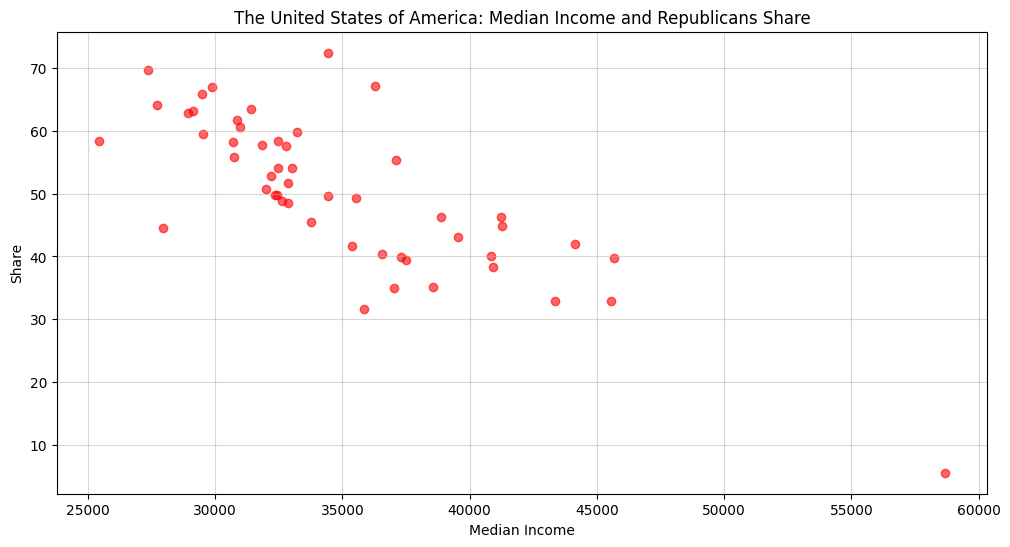

In [514]:
# Change the type of column from str to int.
maps['income_capita'] = maps['income_capita'].astype(int)

# Plot scatterplot share with respect to median income (state-level).
fig, ax1 = plt.subplots(figsize = (12,6))

# Add scatterplots
ax1.scatter(maps['income_capita'], maps['REP_share'], color=['#FF000099'])
ax1.title.set_text("The United States of America: Median Income and Republicans Share")
ax1.set_xlabel("Median Income")
ax1.set_ylabel("Share")
ax1.grid(alpha = 0.5)

<h2><center> Summary </center></h2>

---

The report examined preliminary counties' characteristics that influence the total votes they get during the United States election of 2020. The Data analysis suggests that, at this stage, most of the variables do not provide any additional information, suggesting that the supplementary counties' characteristics data be used. The project suggests that the median age for counties where Republicans won is higher than Democrats, Republican Part won most of the counties with a relatively small population, and females are might likely to vote for Democrats than Republicans. Also, if we look at California, we might conclude that, at least in that state, median income has a negative impact on the Republican Party's voting share.

***However, the additional datasets required to make more comprehensive analysis***

<h2><center> Other Data Sources </center></h2>

---

In [829]:
df_president_enrich

Unnamed: 0    state           county     candidate party  total_votes  \
2799       16658  Alabama  Lawrence County  Donald Trump   REP        12322   
2802       16670  Alabama   Lowndes County     Joe Biden   DEM         4972   
2803       16674  Alabama     Macon County     Joe Biden   DEM         7108   
2804       16678  Alabama   Madison County  Donald Trump   REP       102780   
2805       16682  Alabama   Marengo County     Joe Biden   DEM         5488   
...          ...      ...              ...           ...   ...          ...   
2746       16426  Wyoming    Carbon County  Donald Trump   REP         5014   
2745       16421  Wyoming  Campbell County  Donald Trump   REP        16975   
2744       16416  Wyoming  Big Horn County  Donald Trump   REP         4806   
2762       16506  Wyoming     Teton County     Joe Biden   DEM         9848   
2752       16456  Wyoming   Johnson County  Donald Trump   REP         3881   

       won   fips state_code    male  female  median_age  population  \
2799  True   1079         AL   16003   17168        42.2       33171   
2802  True   1085         AL    4830    5406        41.6       10236   
2803  True   1087         AL    8790   10264        38.0       19054   
2804  True   1089         AL  174665  182895        38.5      357560   
2805  True   1091         AL    9446   10092        42.7       19538   
...    ...    ...        ...     ...     ...         ...         ...   
2746  True  56007         WY    8332    7145        38.0       15477   
2745  True  56005         WY   24559   23149        33.5       47708   
2744  True  56003         WY    6033    5868        41.3       11901   
2762  True  56039         WY   11911   11148        39.3       23059   
2752  True  56019         WY    4477    4038        45.5        8515   

      female_percentage        lat        long color  
2799          51.756052  34.521678  -87.310991   red  
2802          52.813599  32.154746  -86.650108  blue  
2803          53.867954  32.385939  -85.692656  blue  
2804          51.150856  34.763090  -86.550225   red  
2805          51.653189  32.247665  -87.789531  blue  
...                 ...        ...         ...   ...  
2746          46.165278  41.694360 -106.930667   red  
2745          48.522260  44.248188 -105.548208   red  
2744          49.306781  44.526690 -107.995183   red  
2762          48.345548  43.934651 -110.589818  blue  
2752          47.422196  44.038799 -106.584673   red  

[3045 rows x 17 columns]

We included additional dataset since main dataset does not include any independent variable that might exlpaine dependent total votes variable. The additional dataset which where included in the analysis contains a smaller amount of observations since it includes only the won counties of each party; however, it provides basis charachteristics of county, total poluation and female percentage.

In [699]:
income_california.head()

median_income            county        state
0          99406    Alameda County   California
1          63750     Alpine County   California
2          62772     Amador County   California
3          52537      Butte County   California
4          63158  Calaveras County   California

The additional dataset provides the basic economic variable, median income (independent variable), that might better explain the voting behaviour (dependent variable).

<h2><center> Further Steps </center></h2>

---

In [624]:
pop_st_c = df_rd[["state", "county", "party", "population", "total_votes"]]
pop_st_c = pop_st_c[pop_st_c.state.isin(["California"])]

pop_st_c["REP_votes"] = pop_st_c[pop_st_c.party == "REP"]["total_votes"]
pop_st_c["DEM_votes"] = pop_st_c[pop_st_c.party == "DEM"]["total_votes"]

pop_st_c = pop_st_c.groupby(["state","county"], as_index = False).sum()
pop_st_c["population"] = pop_st_c["population"]/2
pop_st_c = pop_st_c.astype({"DEM_votes":'int', "REP_votes":'int', "population":'int'})

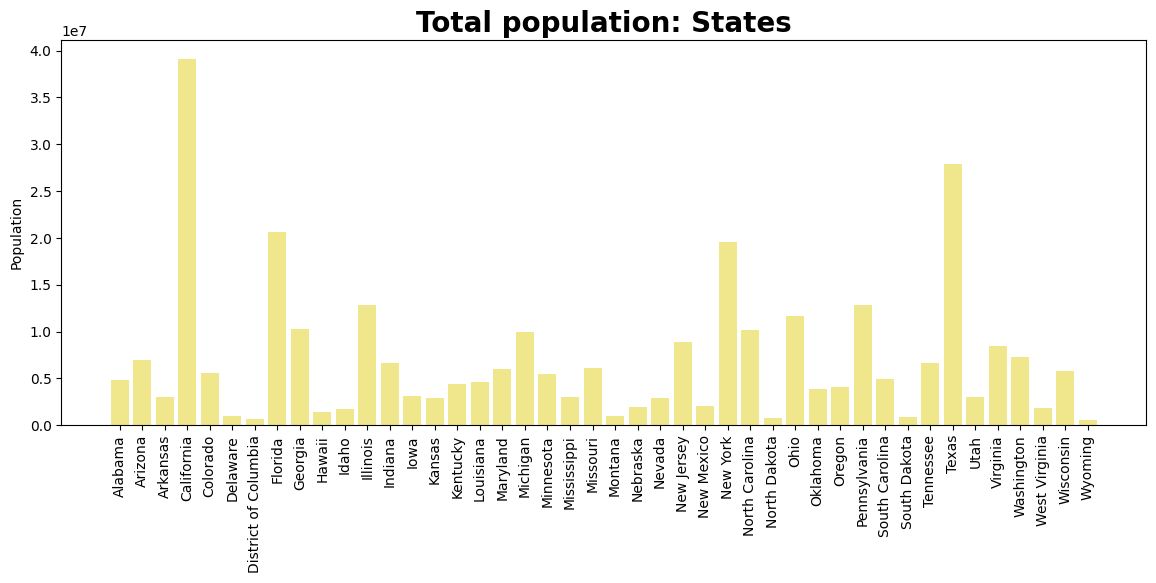

In [669]:
pop = df_president_enrich[["state", "population"]].groupby("state", as_index = False).sum()

plt.figure(1, figsize = (14,5))
plt.bar(pop['state'], pop['population'], color=['#f0e68c'])
plt.ylabel("Population")
plt.title("Total population: States", fontweight = 'bold', fontsize = 20)
plt.xticks(rotation=90)
plt.rc('axes', axisbelow = True)


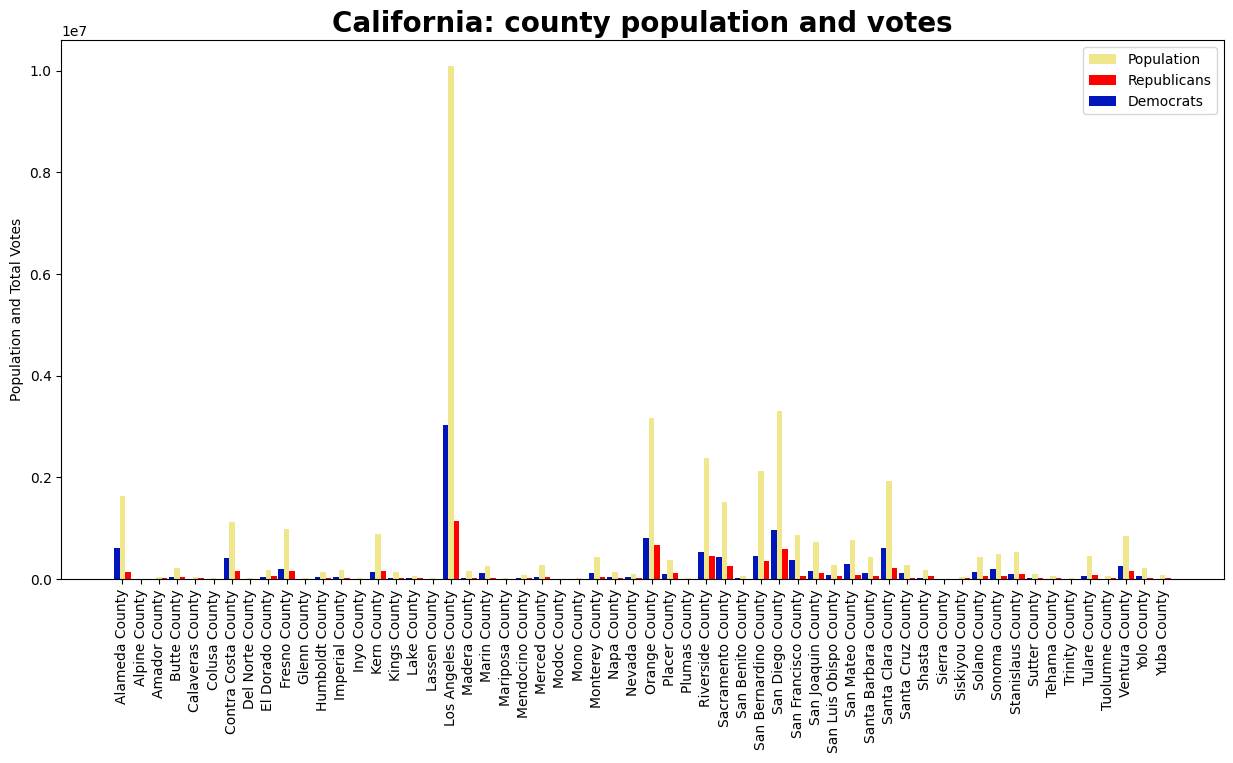

In [673]:
x = list(pop_st_c["county"].unique())
X_axis = np.arange(len(x))

plt.figure(1, figsize = (15,7))
plt.bar(X_axis, pop_st_c['population'], label = 'Population', width = 0.3, color=['#f0e68c'])
plt.bar(X_axis + 0.3, pop_st_c['REP_votes'], label = 'Republicans', width = 0.3, color=['#FF0000'])
plt.bar(X_axis - 0.3, pop_st_c['DEM_votes'], label = 'Democrats', width = 0.3, color=['#0015BC'])
plt.xticks(X_axis, x)
plt.ylabel("Population and Total Votes")
plt.title("California: county population and votes", fontweight = 'bold', fontsize = 20)
plt.xticks(rotation=90)
plt.legend()
plt.rc('axes', axisbelow = True)

I want to put it to use somewhere, but I'm not sure where. Any suggestions? I am using the finalized data but as we can see that population is much larger than total votes made. 